In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# ---- Step 1: Load data ----
dataset = pd.read_csv("/content/marketing_campaign.csv", sep="\t")

In [3]:
# Select relevant columns
dataset = dataset[['Income', 'Recency', 'MntWines', 'MntFruits',
                   'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
                   'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                   'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [4]:
# ---- Step 2: Handle missing values ----
dataset = dataset.dropna()   # remove rows with NA

In [5]:
# ---- Step 3: Normalize data ----
scaler = StandardScaler()
X = scaler.fit_transform(dataset)

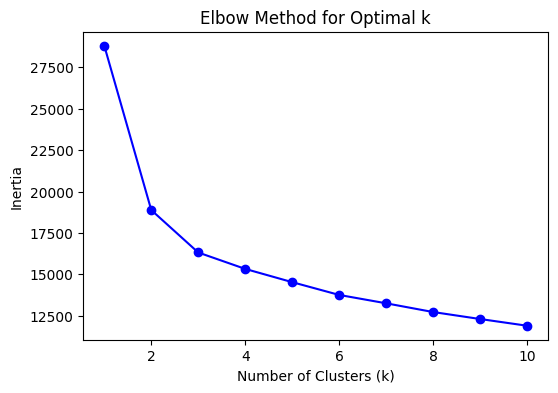

In [25]:
# ---- Step 4: Find optimal number of clusters (Elbow Method) ----
inertia = []
K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

In [7]:
# ---- Step 5: Cluster with chosen k (say k=3) ----
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
dataset['Cluster'] = kmeans.fit_predict(X)

In [8]:
# ---- Step 6: Analyze clusters ----
print("\nCluster Means:")
print(dataset.groupby('Cluster')[['Income','MntWines','MntMeatProducts','NumWebPurchases']].mean())


Cluster Means:
               Income    MntWines  MntMeatProducts  NumWebPurchases
Cluster                                                            
0        49525.763636  331.012121        95.400000         6.396970
1        67408.156250  609.710417       228.456250         5.966667
2        78434.067470  567.901205       502.057831         5.074699
3        34843.949546   38.858729        20.754793         1.989909


In [9]:
# ---- Step 7: Visualize clusters (PCA 2D plot) ----
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

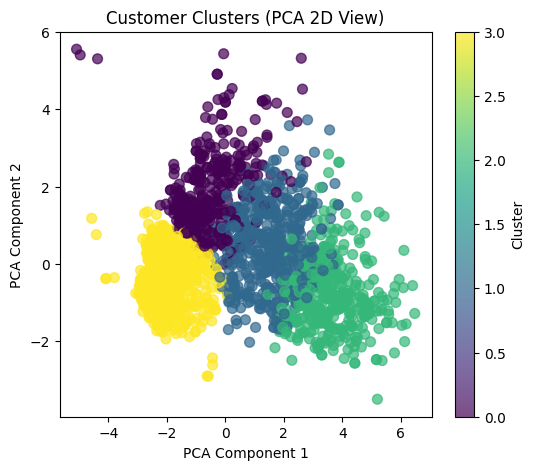

In [10]:
plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dataset['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Customer Clusters (PCA 2D View)")
plt.colorbar(label="Cluster")
plt.show()
